In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
print(class_names)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [5]:
len(dataset)

68

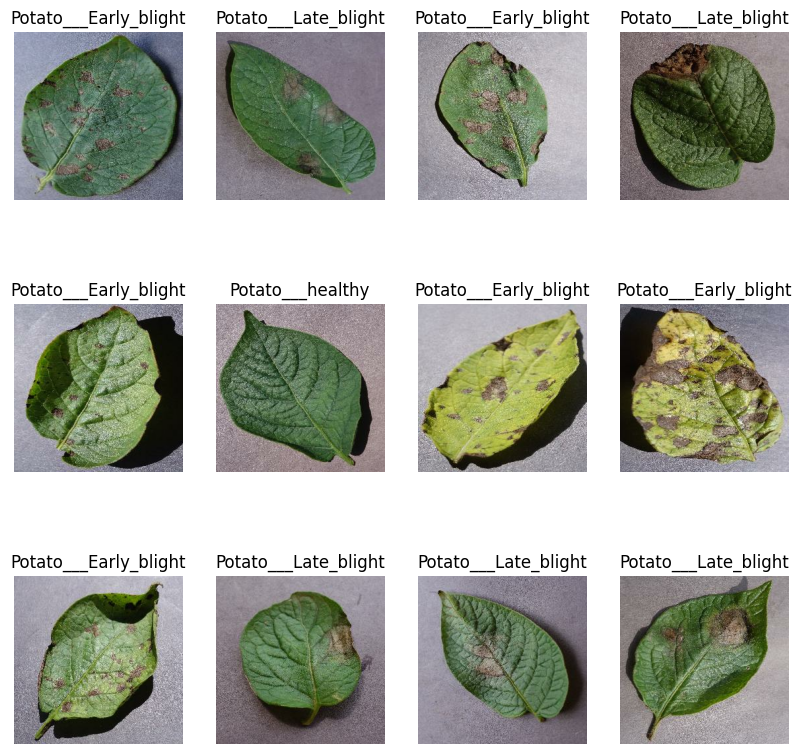

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

80% ==> training
20% ==> 10% validation, 10% testing

In [7]:
train_size = 0.8
len (dataset) *train_size

54.400000000000006

In [8]:
train_ds= dataset.take(54)
len(train_ds)

54

In [9]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [10]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [11]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split =0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=5)
    train_size = int(train_split * ds_size)
    val_size = int(val_split *ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Verification

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

Caching and prefetching to improve performance while CPU and GPU work

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch (buffer_size=tf.data.AUTOTUNE)

Data Augmentation

In [19]:
import tensorflow as tf
from tensorflow.keras import layers
IMAGE_SIZE = 256
resize_and_rescale = tf.keras.Sequential([
     layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.Rescaling(1.0/255)
])

In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers

data_augmentation = tf.keras. Sequential([
layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation (0.2),
layers.RandomZoom(0.1),])

In [22]:
from tensorflow.keras import Input

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)             │ (None, 256, 256, 3)        │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ sequential_1 (Sequential)           │ (None, 256, 256, 3)        │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_6 (Conv2D)                   │ (None, 254, 254, 32)       │            896 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_6 (MaxPooling2D)      │ (None, 127, 127, 32)       │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_7 (Conv2D)                   │ (None, 125, 125, 64)       │         18,496 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_7 (MaxPooling2D)      │ (None, 62, 62, 64)         │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_8 (Conv2D)                   │ (None, 60, 60, 64)         │         36,928 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_8 (MaxPooling2D)      │ (None, 30, 30, 64)         │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_9 (Conv2D)                   │ (None, 28, 28, 64)         │         36,928 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_9 (MaxPooling2D)      │ (None, 14, 14, 64)         │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_10 (Conv2D)                  │ (None, 12, 12, 64)         │         36,928 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_10 (MaxPooling2D)     │ (None, 6, 6, 64)           │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_11 (Conv2D)                  │ (None, 4, 4, 64)           │         36,928 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_11 (MaxPooling2D)     │ (None, 2, 2, 64)           │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ flatten_1 (Flatten)                 │ (None, 256)                │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_2 (Dense)                     │ (None, 64)                 │         16,448 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_3 (Dense)                     │ (None, 3)                  │            195 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
optimizer='adam',
loss = tf.keras.losses. SparseCategoricalCrossentropy (from_logits=False),
metrics=['accuracy'],
)

In [26]:
history = model.fit(
        train_ds,
        epochs = EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_data=val_ds
    )


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 575ms/step - accuracy: 0.4516 - loss: 0.9527 - val_accuracy: 0.5469 - val_loss: 0.8251
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 741ms/step - accuracy: 0.6357 - loss: 0.7322 - val_accuracy: 0.7344 - val_loss: 0.5236
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 832ms/step - accuracy: 0.7443 - loss: 0.4893 - val_accuracy: 0.7917 - val_loss: 0.4921
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 731ms/step - accuracy: 0.8284 - loss: 0.3615 - val_accuracy: 0.8542 - val_loss: 0.3373
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 592ms/step - accuracy: 0.8393 - loss: 0.3693 - val_accuracy: 0.8177 - val_loss: 0.4112
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 575ms/step - accuracy: 0.9154 - loss: 0.2405 - val_accuracy: 0.8802 - val_loss: 0.2843
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 575ms/step - accuracy: 0.9120 - loss: 0.2852 - val_accuracy: 0.6927 - val_loss: 1.1051
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 616ms/step - accuracy: 0.9001 - loss: 0.2643 - val_accu

In [85]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.8514 - loss: 0.4811


In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

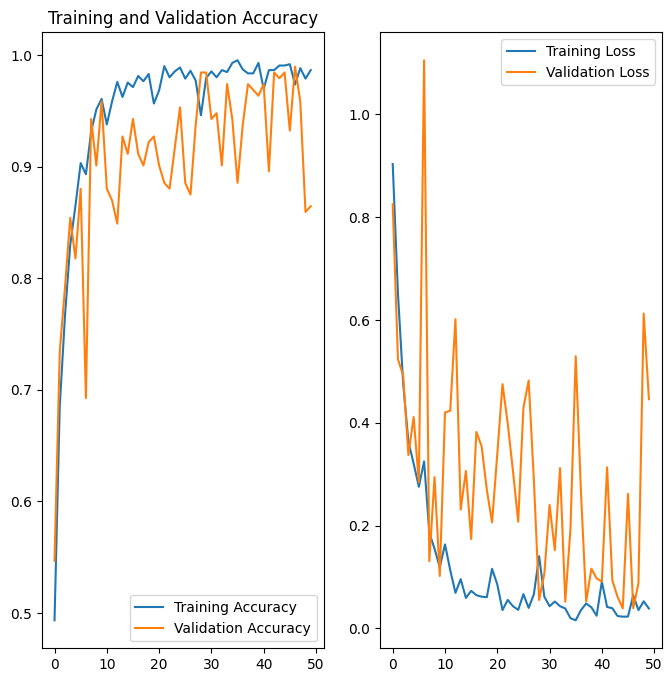

In [32]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')


first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
predicted label: Potato___Late_blight


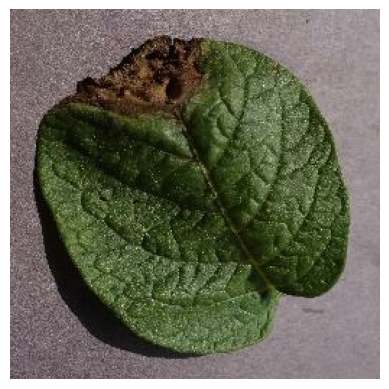

In [100]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    plt.axis('off')
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis('off')

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


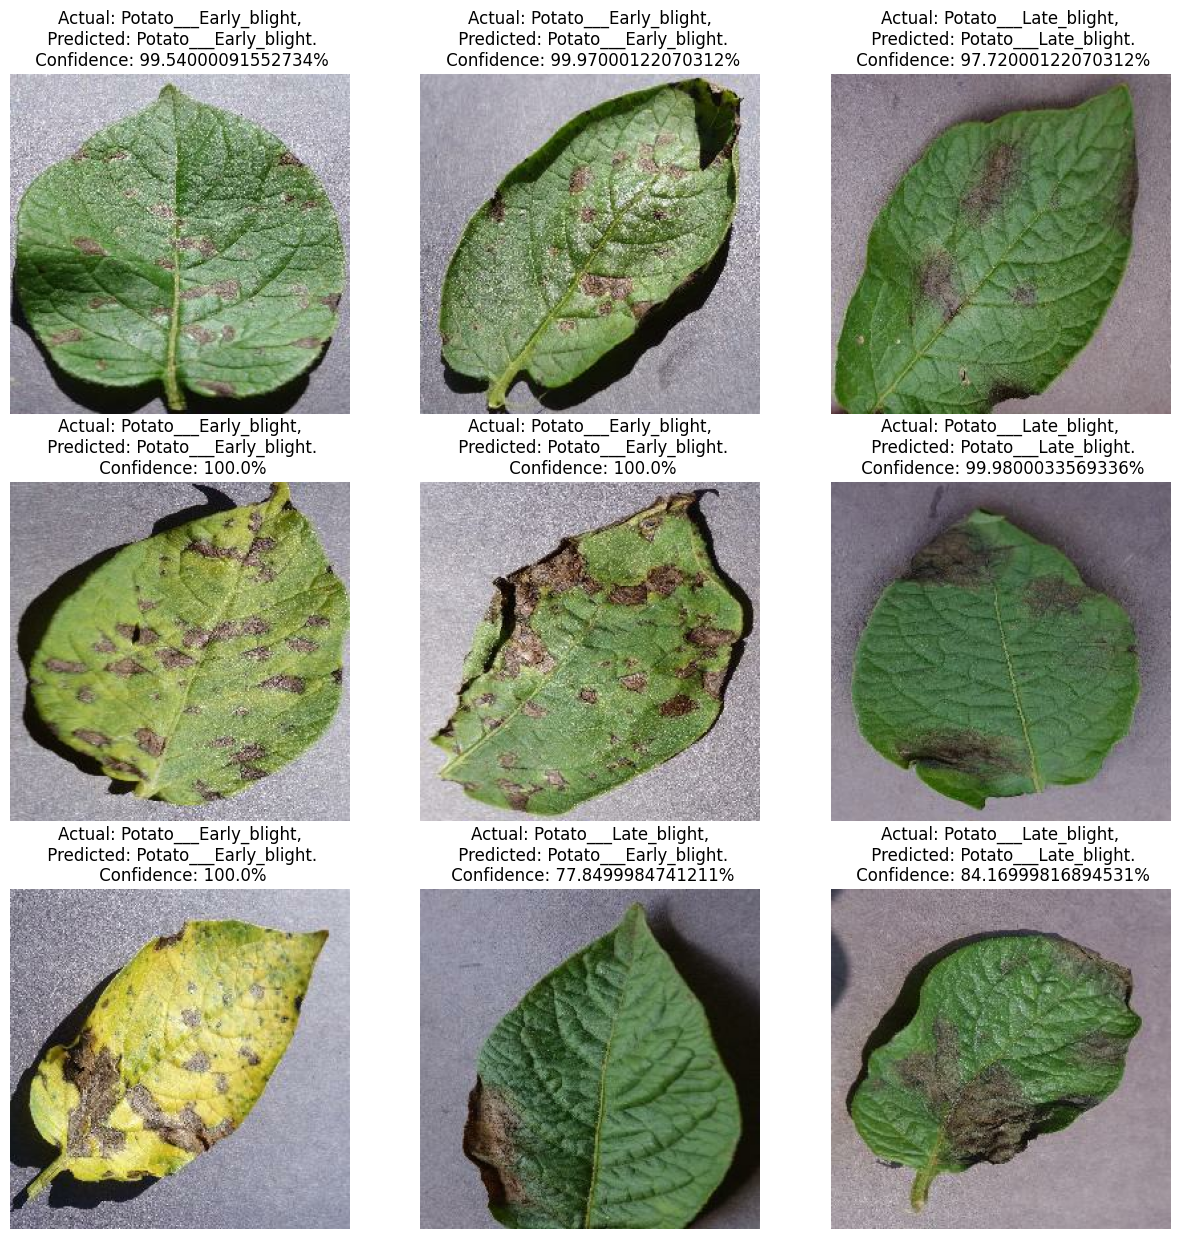

In [101]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [112]:
import os

# Create models directory
os.makedirs("models", exist_ok=True)

# Get list of directories, filter out non-numeric and .keras files
def get_version_numbers():
    all_items = os.listdir("models")
    version_numbers = []
    for item in all_items:
        # Remove .keras extension if present
        clean_name = item.replace('.keras', '')
        try:
            version_numbers.append(int(clean_name))
        except ValueError:
            continue
    return version_numbers

# Calculate next version number
model_version = max(get_version_numbers() + [0]) + 1
version_dir = f"models/{model_version}"
os.makedirs(version_dir, exist_ok=True)

# Save model in the specified directory structure
model.save(os.path.join(version_dir, "model.keras"))

In [65]:
model.save("../potatoes.h5")